In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  #  больше строк
pd.set_option('display.max_columns', 50)  #  больше колонок
stud = pd.read_csv('stud_math.csv')
stud

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


### ПЕРВИЧНАЯ ОБРАБОТКА ДАННЫХ.УДАЛЕНИЕ ПУСТЫХ ЗНАЧЕНИЙ

In [4]:
stud.failures = stud.failures.astype(str)
stud


def changing(column):
    """Заменяет все пустые значения на соседние"""
    if stud[column].dtype == 'O':
        moda = str(stud[column].mode().iloc[0])
        stud[column] = stud[column].astype(str).apply(lambda x: moda if pd.isnull(x)
                                                      else moda if x == 'nan' else x)
    else:
        stud[column] = stud[column].apply(lambda x: None if pd.isnull(x)
                                          else None if x == 'nan' else x)
    return
# changing('Fjob')


for columns in stud.columns:
    changing(columns)


# В числовых - NONE, так как не удалили выбросы

### ОЦЕНКА КОЛИЧЕСТВА УНИКАЛЬНЫХ ЗНАЧЕНИЙ ДЛЯ НОМИНАТИВЫХ ПЕРЕМЕННЫХ

In [9]:
# stud.school.dtype
c = []  # список категорий
d = []  # К-во уникальных значений
r = []  # Значения
e = []
for column in stud.columns:
    if stud[column].dtype == 'O':
        c.append(column)
        d.append(stud[column].nunique())

        for i in range(0, stud[column].nunique()):
            e.append(stud[column].value_counts().reset_index()['index'][i])
        r.append(e)
        e = []
        #print("Уникальных значений:",column, stud[column].nunique())
#print (r)
uniqs = pd.DataFrame(
    {'Категория': c, 'Кол-во уникальных значений': d, 'Значения': r})
uniqs
# 17 столбцов -  текстовые (failures далее уберать из номинативных)

,Категория,Кол-во уникальных значений,Значения
0,school,2,"[GP, MS]"
1,sex,2,"[F, M]"
2,address,2,"[U, R]"
3,famsize,2,"[GT3, LE3]"
4,Pstatus,2,"[T, A]"
5,Mjob,5,"[other, services, at_home, teacher, health]"
6,Fjob,5,"[other, services, teacher, at_home, health]"
7,reason,4,"[course, home, reputation, other]"
8,guardian,3,"[mother, father, other]"
9,schoolsup,2,"[no, yes]"


### РАСПРЕДЕЛЕНИЕ ПРИЗНАКА ДЛЯ ЧИСЛОВЫХ ПЕРЕМЕННЫХ, УСТРАНЕНИЕ ВЫБРОСОВ

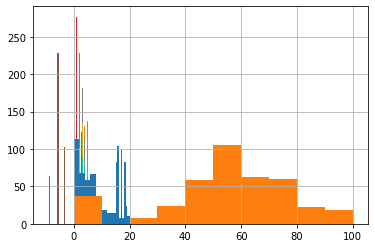

In [5]:
def Borders(column):
    '''Определяет нижнюю и верхнюю границу распределения параметра'''
    IQR = stud[column].quantile(0.75) - stud[column].quantile(0.25)
    perc25 = stud[column].quantile(0.25)
    perc75 = stud[column].quantile(0.75)
    lowgrade = perc25 - 1.5*IQR
    uppergrade = perc75 + 1.5*IQR
    return lowgrade, uppergrade


def outofrange(column):
    '''Заменяем выбросы и пустые значения на среднее'''
    if stud[column].dtype != 'O':
        mean = round(stud[column].mean(), 0)
        low = Borders(column)[0]
        up = Borders(column)[1]
        stud[column] = stud[column].apply(lambda x: mean
                                          if x < low or x > up
                                          else mean
                                          if x == 'nan'
                                          else mean
                                          if pd.isnull(x)
                                          else x)
        #display (stud[column])
    return


for columns in stud.columns:
    outofrange(columns)
    
list_of_corr_data = []
for columns in stud.columns:
    if stud[columns].dtype != 'O':
        list_of_corr_data.append(columns)
        
        stud[columns].hist()
     

stud.failures = stud.failures.astype(float)

In [22]:
# sns.pairplot(stud,kind = 'reg')
stud.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.167336,-0.163800,0.115995,0.062139,0.195702,-0.062139,0.040882,0.025141,0.119646,-0.046443,0.138191,-0.151476
Medu,-0.167336,1.000000,0.615149,-0.112271,0.087683,-0.245110,-0.087683,0.052018,0.016329,0.063361,-0.050991,0.067575,0.207583
Fedu,-0.163800,0.615149,1.000000,-0.072144,0.086223,-0.269487,-0.086223,-0.014232,-0.028285,0.037552,0.006361,-0.001677,0.132977
traveltime,0.115995,-0.112271,-0.072144,1.000000,-0.116009,-0.009923,0.116009,-0.042021,-0.062603,-0.025698,-0.063066,-0.053345,-0.056016
studytime,0.062139,0.087683,0.086223,-0.116009,1.000000,-0.133382,-1.000000,0.072688,-0.086159,-0.046247,-0.044770,-0.078220,0.110133
failures,0.195702,-0.245110,-0.269487,-0.009923,-0.133382,1.000000,0.133382,0.023199,0.102808,0.113649,0.075849,0.091176,-0.328451
"studytime, granular",-0.062139,-0.087683,-0.086223,0.116009,-1.000000,0.133382,1.000000,-0.072688,0.086159,0.046247,0.044770,0.078220,-0.110133
famrel,0.040882,0.052018,-0.014232,-0.042021,0.072688,0.023199,-0.072688,1.000000,0.109453,0.087790,0.025372,-0.032353,0.053906
freetime,0.025141,0.016329,-0.028285,-0.062603,-0.086159,0.102808,0.086159,0.109453,1.000000,0.261007,0.057019,0.074306,0.001401
goout,0.119646,0.063361,0.037552,-0.025698,-0.046247,0.113649,0.046247,0.087790,0.261007,1.000000,-0.014274,0.111085,-0.127048


Выводы:
- Studytime и Studytime granular полностью коррелирующие величины. 
- У остальных данных слабая хависимость, так как значения корреляции близки к 0

### АНАЛИЗ НОМИНАТИВНЫХ ПЕРЕМЕННЫХ

In [10]:
#  

In [7]:
def get_stat_dif(column):
    cols = stud[column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'],
                     stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all): 
            print('Найдены стат-ки значимые различия для колонки', column)
            break


for columns in stud.columns:
    if stud[columns].dtype == 'O':
        get_stat_dif(columns)

Найдены стат-ки значимые различия для колонки address
Найдены стат-ки значимые различия для колонки Mjob
Найдены стат-ки значимые различия для колонки higher
Найдены стат-ки значимые различия для колонки romantic


Вывод:Все колонки, кроме address, Mjob, higher и romantic не влияют на score. 

### Датафрейм с данными, влияющими на score

In [25]:
# stud.age.dtype
list_stat_diff_data = ['address', 'Mjob', 'higher', 'romantic']
list_of_corr_data = []
for columns in stud.columns:
    if stud[columns].dtype != 'O':
        list_of_corr_data.append(columns)

#list_of_corr_data = list_of_corr_data.drop['studytime, granular']
full_list = list_stat_diff_data + list_of_corr_data
stud_for_model = stud[full_list].drop(['studytime, granular'], axis=1)
stud_for_model

,address,Mjob,higher,romantic,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
0,U,at_home,yes,no,18.0,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,3.0,6.0,30.0
1,U,at_home,yes,no,17.0,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,3.0,4.0,30.0
2,U,at_home,yes,no,15.0,1.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,3.0,10.0,50.0
3,U,health,yes,yes,15.0,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,5.0,2.0,75.0
4,U,other,yes,no,16.0,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,U,services,yes,no,20.0,2.0,2.0,1.0,2.0,2.0,5.0,5.0,4.0,4.0,7.0,45.0
391,U,services,yes,no,17.0,3.0,1.0,2.0,1.0,0.0,4.0,4.0,5.0,2.0,3.0,80.0
392,R,other,yes,no,21.0,1.0,1.0,1.0,1.0,3.0,5.0,5.0,3.0,3.0,3.0,35.0
393,R,services,yes,no,18.0,3.0,2.0,3.0,1.0,0.0,4.0,4.0,1.0,5.0,0.0,50.0


Выводы:
- Для построения модели были выбраны влияюще на score номинативные и числовые параметры.
- Выводные не данные не имеют пустых ячеек.
- Пустые ячейки и выбросы в числовых параметрах заменены на медиану.
- Пустые ячейки в номинативных параметрах заменены на моду.
- На оценку сильно влияет образование отца и матери ребенка.
- На оценку отрицательно влияет наличие неудач.